# SOM (Self Organizing Map; 자기조직화지도)
### by 우현우 Hyunwoo Woo (Hub1)
#### Dept. of Industrial Engineering, Yonsei Univ  (Industrial Statistics Lab; ISL 산업통계연구실)
#### hw.woo@yonsei.ac.kr   (010 8966 5705)
#### blog: https://hub1.tistory.com
#### github repository: https://github.com/HyunwooWoo

##### ----------------------------------------------------------------------------------

# SOM Practice

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('fa_data_bfi.csv')
dataset

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384
2,0.520534,0.318235,0.025646,-0.751136,0.204503
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042
...,...,...,...,...,...
2431,1.308046,-1.152403,-0.104197,-1.146411,0.412042
2432,0.732472,0.252206,-0.587511,-0.317781,1.025564
2433,-0.223267,0.721169,0.787110,-1.058480,0.925103
2434,0.920520,0.749337,0.070953,-2.135145,0.673460


In [125]:
print(dataset.shape)

(2436, 5)


In [126]:
dataset.describe() # 기초통계량

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
count,2.436000e+03,2.436000e+03,2.436000e+03,2.436000e+03,2.436000e+03
mean,1.895947e-17,-1.166737e-17,2.333474e-17,4.448184e-17,-3.646053e-17
std,9.236532e-01,8.771326e-01,8.628192e-01,8.445489e-01,8.271759e-01
min,-2.900034e+00,-2.964398e+00,-3.086888e+00,-3.611214e+00,-3.260500e+00
25%,-7.210416e-01,-5.274507e-01,-5.533678e-01,-4.973700e-01,-5.699871e-01
50%,-5.976721e-02,7.642778e-02,7.095942e-02,1.261594e-01,2.820526e-02
75%,6.603891e-01,6.468802e-01,6.344018e-01,6.057907e-01,6.193536e-01
max,2.738694e+00,2.461448e+00,1.941907e+00,2.179653e+00,2.011314e+00


In [127]:
X = dataset.iloc[:, :].values

In [126]:
# !pip install MiniSom

  Using cached MiniSom-2.2.9.tar.gz (8.1 kB)
  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8603 sha256=78de989f97c4defec2b07baaf513a094ca2bbbb1d0789341736eafff6ab14500
  Stored in directory: c:\users\hwwoo\appdata\local\pip\cache\wheels\b2\b8\f9\08876fa31be00070d6a60686b9842e044d1a9b471e8d6772d4
Successfully built MiniSom


Parameters :

- x and y = dimensions of the grid

- input_len = No of features in input dataset

- sigma = radius of the neighbourhoods

- learning_rate = By how much the weiights are updated in each iteration. Higher the value faster the algorithm runs.

In [128]:
from minisom import MiniSom
som = MiniSom(x=3 ,y=3 ,sigma=1.0 ,learning_rate=0.1 ,input_len=5)
# Initializing the weights
som.random_weights_init(X) # random_weights_init 으로 각 node 들을 초기화
som.train_random(data=X ,num_iteration=100) # train_random 메서드로 SOM 학습을 시작

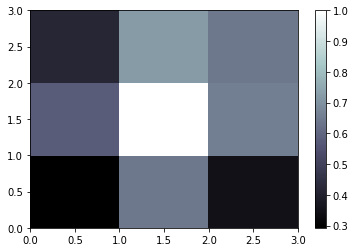

In [129]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

show()
# node 에 최근접한 data point 들이 많을수록 짙게, 적을수록 옅게 표시

In [130]:
som.distance_map() # Each cell is the normalised sum of the distances between a neuron and its neighbours.
# 아래 결과는 좌표상으로는 다음과 같음
# (1,1), (1,2), (1,3)
# (2,1), (2,2), (2,3)
# (3,1), (3,2), (3,3)

## (1,3)이 그림에서 가장 우측 아래, (3,3)이 가장 우측상단 의미

array([[0.29285751, 0.57717181, 0.41235619],
       [0.64070274, 1.        , 0.72020191],
       [0.34859047, 0.65386486, 0.64061567]])

In [131]:
mapping = som.win_map(X)

In [132]:
type(mapping)

collections.defaultdict

In [133]:
np.array(mapping[0,0]) # competitive map에서 특정 좌표에 존재하는 관측치들이 각각 가지는 feature의 값

array([[ 2.26673182e-01,  1.07862703e+00,  1.31271017e+00,
        -1.18515852e-01,  3.00929650e-01],
       [-6.49210683e-01,  7.23217655e-01,  8.61668319e-01,
        -1.57010447e-01,  6.12093902e-01],
       [-1.82038976e-02,  1.24236018e+00,  8.67823724e-01,
        -1.04006007e+00,  1.76105730e-01],
       [ 5.14268058e-01,  3.52885899e-01,  1.06239146e+00,
         8.33359482e-01,  1.23877815e+00],
       [ 7.30664343e-02,  7.94932209e-01,  1.87170261e-01,
        -7.38720586e-01,  6.20219222e-01],
       [ 5.24522097e-01,  1.29747347e+00,  1.05474909e+00,
        -1.03865675e+00,  1.00763891e+00],
       [ 2.42059365e-01,  9.14126941e-01,  1.19089261e+00,
        -6.59677435e-02,  7.19053824e-01],
       [-6.40557616e-01,  1.42592722e+00,  4.32179955e-01,
        -1.88840839e+00,  4.97250439e-01],
       [ 3.97906329e-01,  6.35891926e-01, -8.65389864e-02,
         4.79777427e-01,  5.04895012e-01],
       [ 7.76182265e-01,  4.51136177e-01,  7.30212113e-01,
         2.92874383e-02

In [134]:
np.array(mapping[0,0]).shape # competitive map이 3x3이므로, mapping[i,j]에서 i와 j는 0~2까지의 숫자를 넣을 수 있음
# (해당 좌표에 포함된 sample 수, feature 개수)

(168, 5)

In [135]:
pd.DataFrame(mapping[0,0])

,0,1,2,3,4
0,0.226673,1.078627,1.312710,-0.118516,0.300930
1,-0.649211,0.723218,0.861668,-0.157010,0.612094
2,-0.018204,1.242360,0.867824,-1.040060,0.176106
3,0.514268,0.352886,1.062391,0.833359,1.238778
4,0.073066,0.794932,0.187170,-0.738721,0.620219
...,...,...,...,...,...
163,-0.193953,0.356430,1.118133,0.036046,0.497052
164,-0.032249,0.984047,1.046707,-0.853321,0.727716
165,1.144534,1.325192,0.626019,0.101881,1.480198
166,0.827423,1.188910,1.037375,0.612881,0.769660


In [136]:
for i in range(0,3):
    for j in range(0,3):
        print("(", i+1, ",", j+1, ")", "allocated obseravations:", np.array(mapping[i,j]).shape[0])

( 1 , 1 ) allocated obseravations: 168
( 1 , 2 ) allocated obseravations: 194
( 1 , 3 ) allocated obseravations: 214
( 2 , 1 ) allocated obseravations: 422
( 2 , 2 ) allocated obseravations: 286
( 2 , 3 ) allocated obseravations: 397
( 3 , 1 ) allocated obseravations: 195
( 3 , 2 ) allocated obseravations: 453
( 3 , 3 ) allocated obseravations: 107


In [137]:
sum_mapping = 0
for i in range(0,3):
    for j in range(0,3):
        sum_mapping = sum_mapping + np.array(mapping[i,j]).shape[0]
print("# of observations=", sum_mapping)

# of observations= 2436


In [138]:
pd.DataFrame(mapping[0,0]).describe() # competitive map에서 특정 좌표의 기초통계량

,0,1,2,3,4
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,-0.101829,0.850091,0.732887,-0.295699,0.685445
std,0.617326,0.477848,0.551554,0.739264,0.494753
min,-1.839635,-0.514626,-1.554359,-2.971719,-0.517493
25%,-0.487791,0.533420,0.376751,-0.755814,0.346881
50%,-0.092942,0.837927,0.859611,-0.120548,0.688642
75%,0.276299,1.201756,1.160091,0.211462,1.052740
max,1.249096,1.826873,1.685540,1.068610,1.895334


In [139]:
pd.DataFrame(mapping[0,0]).describe().loc['mean']

0   -0.101829
1    0.850091
2    0.732887
3   -0.295699
4    0.685445
Name: mean, dtype: float64

In [140]:
pd.DataFrame(mapping[0,0]).describe().loc['std']

0    0.617326
1    0.477848
2    0.551554
3    0.739264
4    0.494753
Name: std, dtype: float64

In [141]:
pd.DataFrame(mapping[0,0]).describe().loc['50%']

0   -0.092942
1    0.837927
2    0.859611
3   -0.120548
4    0.688642
Name: 50%, dtype: float64

In [142]:
mean_list = []
std_list = []
median_list = []
index_list = []
for i in range(0, 3):
    for j in range(0, 3):
        mean_list.append(pd.DataFrame(mapping[0,0]).describe().loc['mean'])
        std_list.append(pd.DataFrame(mapping[0,0]).describe().loc['std'])
        median_list.append(pd.DataFrame(mapping[0,0]).describe().loc['50%'])
        index_list.append('(' + str(i) + ',' + str(j) + ')' )

In [143]:
pd.DataFrame(mean_list, index =index_list) # competitive map에서 각 좌표별 feature의 평균값

,0,1,2,3,4
"(0,0)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(0,1)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(0,2)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(1,0)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(1,1)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(1,2)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(2,0)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(2,1)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(2,2)",-0.101829,0.850091,0.732887,-0.295699,0.685445


In [144]:
pd.DataFrame(median_list, index =index_list) # competitive map에서 각 좌표별 feature의 중앙값

,0,1,2,3,4
"(0,0)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(0,1)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(0,2)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(1,0)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(1,1)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(1,2)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(2,0)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(2,1)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(2,2)",-0.092942,0.837927,0.859611,-0.120548,0.688642


In [145]:
pd.DataFrame(std_list, index =index_list) # competitive map에서 각 좌표별 feature의 표준편차

,0,1,2,3,4
"(0,0)",0.617326,0.477848,0.551554,0.739264,0.494753
"(0,1)",0.617326,0.477848,0.551554,0.739264,0.494753
"(0,2)",0.617326,0.477848,0.551554,0.739264,0.494753
"(1,0)",0.617326,0.477848,0.551554,0.739264,0.494753
"(1,1)",0.617326,0.477848,0.551554,0.739264,0.494753
"(1,2)",0.617326,0.477848,0.551554,0.739264,0.494753
"(2,0)",0.617326,0.477848,0.551554,0.739264,0.494753
"(2,1)",0.617326,0.477848,0.551554,0.739264,0.494753
"(2,2)",0.617326,0.477848,0.551554,0.739264,0.494753


# Appendix

## SOM Code 뜯어보기

In [106]:
import inspect
 
print(inspect.getsource(MiniSom))

class MiniSom(object):
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5,
                 decay_function=asymptotic_decay,
                 neighborhood_function='gaussian', topology='rectangular',
                 activation_distance='euclidean', random_seed=None):
        """Initializes a Self Organizing Maps.

        A rule of thumb to set the size of the grid for a dimensionality
        reduction task is that it should contain 5*sqrt(N) neurons
        where N is the number of samples in the dataset to analyze.

        E.g. if your dataset has 150 samples, 5*sqrt(150) = 61.23
        hence a map 8-by-8 should perform well.

        Parameters
        ----------
        x : int
            x dimension of the SOM.

        y : int
            y dimension of the SOM.

        input_len : int
            Number of the elements of the vectors in input.

        sigma : float, optional (default=1.0)
            Spread of the neighborhood function, needs to be adequ

In [8]:
# SOM Code
from math import sqrt

from numpy import (array, unravel_index, nditer, linalg, random, subtract,
                   power, exp, pi, zeros, arange, outer, meshgrid, dot)
from collections import defaultdict
from warnings import warn


"""
    Minimalistic implementation of the Self Organizing Maps (SOM).
"""


def fast_norm(x):
    """Returns norm-2 of a 1-D numpy array.

    * faster than linalg.norm in case of 1-D arrays (numpy 1.9.2rc1).
    """
    return sqrt(dot(x, x.T))


class MiniSom(object):
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=None, random_seed=None):
        """
            Initializes a Self Organizing Maps.

            x,y - dimensions of the SOM

            input_len - number of the elements of the vectors in input

            sigma - spread of the neighborhood function (Gaussian), needs to be adequate to the dimensions of the map.
            (at the iteration t we have sigma(t) = sigma / (1 + t/T) where T is #num_iteration/2)

            learning_rate - initial learning rate
            (at the iteration t we have learning_rate(t) = learning_rate / (1 + t/T) where T is #num_iteration/2)

            decay_function, function that reduces learning_rate and sigma at each iteration
                            default function: lambda x,current_iteration,max_iter: x/(1+current_iteration/max_iter)

            random_seed, random seed to use.
        """
        if sigma >= x/2.0 or sigma >= y/2.0:
            warn('Warning: sigma is too high for the dimension of the map.')
        if random_seed:
            self.random_generator = random.RandomState(random_seed)
        else:
            self.random_generator = random.RandomState(random_seed)
        if decay_function:
            self._decay_function = decay_function
        else:
            self._decay_function = lambda x, t, max_iter: x/(1+t/max_iter)
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.weights = self.random_generator.rand(x,y,input_len)*2-1 # random initialization
        for i in range(x):
            for j in range(y):
                self.weights[i,j] = self.weights[i,j] / fast_norm(self.weights[i,j]) # normalization
        self.activation_map = zeros((x,y))
        self.neigx = arange(x)
        self.neigy = arange(y) # used to evaluate the neighborhood function
        self.neighborhood = self.gaussian

    def _activate(self, x):
        """ Updates matrix activation_map, in this matrix the element i,j is the response of the neuron i,j to x """
        s = subtract(x, self.weights) # x - w
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.activation_map[it.multi_index] = fast_norm(s[it.multi_index])  # || x - w ||
            it.iternext()

    def activate(self, x):
        """ Returns the activation map to x """
        self._activate(x)
        return self.activation_map

    def gaussian(self, c, sigma):
        """ Returns a Gaussian centered in c """
        d = 2*pi*sigma*sigma
        ax = exp(-power(self.neigx-c[0], 2)/d)
        ay = exp(-power(self.neigy-c[1], 2)/d)
        return outer(ax, ay)  # the external product gives a matrix

    def diff_gaussian(self, c, sigma):
        """ Mexican hat centered in c (unused) """
        xx, yy = meshgrid(self.neigx, self.neigy)
        p = power(xx-c[0], 2) + power(yy-c[1], 2)
        d = 2*pi*sigma*sigma
        return exp(-p/d)*(1-2/d*p)

    def winner(self, x):
        """ Computes the coordinates of the winning neuron for the sample x """
        self._activate(x)
        return unravel_index(self.activation_map.argmin(), self.activation_map.shape)

    def update(self, x, win, t):
        """
            Updates the weights of the neurons.
            x - current pattern to learn
            win - position of the winning neuron for x (array or tuple).
            t - iteration index
        """
        eta = self._decay_function(self.learning_rate, t, self.T)
        sig = self._decay_function(self.sigma, t, self.T) # sigma and learning rate decrease with the same rule
        g = self.neighborhood(win, sig)*eta # improves the performances
        it = nditer(g, flags=['multi_index'])
        while not it.finished:
            # eta * neighborhood_function * (x-w)
            self.weights[it.multi_index] += g[it.multi_index]*(x-self.weights[it.multi_index])
            # normalization
            self.weights[it.multi_index] = self.weights[it.multi_index] / fast_norm(self.weights[it.multi_index])
            it.iternext()

    def quantization(self, data):
        """ Assigns a code book (weights vector of the winning neuron) to each sample in data. """
        q = zeros(data.shape)
        for i, x in enumerate(data):
            q[i] = self.weights[self.winner(x)]
        return q

    def random_weights_init(self, data):
        """ Initializes the weights of the SOM picking random samples from data """
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.weights[it.multi_index] = data[self.random_generator.randint(len(data))]
            self.weights[it.multi_index] = self.weights[it.multi_index]/fast_norm(self.weights[it.multi_index])
            it.iternext()

    def train_random(self, data, num_iteration):
        """ Trains the SOM picking samples at random from data """
        self._init_T(num_iteration)
        for iteration in range(num_iteration):
            rand_i = self.random_generator.randint(len(data)) # pick a random sample
            self.update(data[rand_i], self.winner(data[rand_i]), iteration)

    def train_batch(self, data, num_iteration):
        """ Trains using all the vectors in data sequentially """
        self._init_T(len(data)*num_iteration)
        iteration = 0
        while iteration < num_iteration:
            idx = iteration % (len(data)-1)
            self.update(data[idx], self.winner(data[idx]), iteration)
            iteration += 1

    def _init_T(self, num_iteration):
        """ Initializes the parameter T needed to adjust the learning rate """
        self.T = num_iteration/2  # keeps the learning rate nearly constant for the last half of the iterations

    def distance_map(self):
        """ Returns the distance map of the weights.
            Each cell is the normalised sum of the distances between a neuron and its neighbours.
        """
        um = zeros((self.weights.shape[0], self.weights.shape[1]))
        it = nditer(um, flags=['multi_index'])
        while not it.finished:
            for ii in range(it.multi_index[0]-1, it.multi_index[0]+2):
                for jj in range(it.multi_index[1]-1, it.multi_index[1]+2):
                    if ii >= 0 and ii < self.weights.shape[0] and jj >= 0 and jj < self.weights.shape[1]:
                        um[it.multi_index] += fast_norm(self.weights[ii, jj, :]-self.weights[it.multi_index])
            it.iternext()
        um = um/um.max()
        return um

    def activation_response(self, data):
        """
            Returns a matrix where the element i,j is the number of times
            that the neuron i,j have been winner.
        """
        a = zeros((self.weights.shape[0], self.weights.shape[1]))
        for x in data:
            a[self.winner(x)] += 1
        return a

    def quantization_error(self, data):
        """
            Returns the quantization error computed as the average distance between
            each input sample and its best matching unit.
        """
        error = 0
        for x in data:
            error += fast_norm(x-self.weights[self.winner(x)])
        return error/len(data)

    def win_map(self, data):
        """
            Returns a dictionary wm where wm[(i,j)] is a list with all the patterns
            that have been mapped in the position i,j.
        """
        winmap = defaultdict(list)
        for x in data:
            winmap[self.winner(x)].append(x)
        return winmap

### unit tests
'''
from numpy.testing import assert_almost_equal, assert_array_almost_equal, assert_array_equal


class TestMinisom:
    def setup_method(self, method):
        self.som = MiniSom(5, 5, 1)
        for i in range(5):
            for j in range(5):
                assert_almost_equal(1.0, linalg.norm(self.som.weights[i,j]))  # checking weights normalization
        self.som.weights = zeros((5, 5))  # fake weights
        self.som.weights[2, 3] = 5.0
        self.som.weights[1, 1] = 2.0

    def test_decay_function(self):
        assert self.som._decay_function(1., 2., 3.) == 1./(1.+2./3.)

    def test_fast_norm(self):
        assert fast_norm(array([1, 3])) == sqrt(1+9)

    def test_gaussian(self):
        bell = self.som.gaussian((2, 2), 1)
        assert bell.max() == 1.0
        assert bell.argmax() == 12  # unravel(12) = (2,2)

    def test_win_map(self):
        winners = self.som.win_map([5.0, 2.0])
        assert winners[(2, 3)][0] == 5.0
        assert winners[(1, 1)][0] == 2.0

    def test_activation_reponse(self):
        response = self.som.activation_response([5.0, 2.0])
        assert response[2, 3] == 1
        assert response[1, 1] == 1

    def test_activate(self):
        assert self.som.activate(5.0).argmin() == 13.0  # unravel(13) = (2,3)

    def test_quantization_error(self):
        self.som.quantization_error([5, 2]) == 0.0
        self.som.quantization_error([4, 1]) == 0.5

    def test_quantization(self):
        q = self.som.quantization(array([4, 2]))
        assert q[0] == 5.0
        assert q[1] == 2.0

    def test_random_seed(self):
        som1 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som2 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        assert_array_almost_equal(som1.weights, som2.weights)  # same initialization
        data = random.rand(100,2)
        som1 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som1.train_random(data,10)
        som2 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som2.train_random(data,10)
        assert_array_almost_equal(som1.weights,som2.weights)  # same state after training

    def test_train_batch(self):
        som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        data = array([[4, 2], [3, 1]])
        q1 = som.quantization_error(data)
        som.train_batch(data, 10)
        assert q1 > som.quantization_error(data)

    def test_train_random(self):
        som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        data = array([[4, 2], [3, 1]])
        q1 = som.quantization_error(data)
        som.train_random(data, 10)
        assert q1 > som.quantization_error(data)

    def test_random_weights_init(self):
        som = MiniSom(2, 2, 2, random_seed=1)
        som.random_weights_init(array([[1.0, .0]]))
        for w in som.weights:
            assert_array_equal(w[0], array([1.0, .0]))



'''

'\nfrom numpy.testing import assert_almost_equal, assert_array_almost_equal, assert_array_equal\n\n\nclass TestMinisom:\n    def setup_method(self, method):\n        self.som = MiniSom(5, 5, 1)\n        for i in range(5):\n            for j in range(5):\n                assert_almost_equal(1.0, linalg.norm(self.som.weights[i,j]))  # checking weights normalization\n        self.som.weights = zeros((5, 5))  # fake weights\n        self.som.weights[2, 3] = 5.0\n        self.som.weights[1, 1] = 2.0\n\n    def test_decay_function(self):\n        assert self.som._decay_function(1., 2., 3.) == 1./(1.+2./3.)\n\n    def test_fast_norm(self):\n        assert fast_norm(array([1, 3])) == sqrt(1+9)\n\n    def test_gaussian(self):\n        bell = self.som.gaussian((2, 2), 1)\n        assert bell.max() == 1.0\n        assert bell.argmax() == 12  # unravel(12) = (2,2)\n\n    def test_win_map(self):\n        winners = self.som.win_map([5.0, 2.0])\n        assert winners[(2, 3)][0] == 5.0\n        asser

## SOM 연습2

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Credit_Card_Applications.csv') # https://www.kaggle.com/ujjwal9/credit-card-applications

In [50]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [59]:
dataset['Class'].value_counts() # 0 = Card Approved, 1 = Card Denied

0    383
1    307
Name: Class, dtype: int64

In [43]:
dataset.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [60]:
dataset = dataset.copy().loc[:,['A2', 'A3', 'A5', 'A6', 'A7', 'A13', 'A14', 'Class']] # continuous features만
dataset

,A2,A3,A5,A6,A7,A13,A14,Class
0,22.08,11.460,4,4,1.585,100,1213,0
1,22.67,7.000,8,4,0.165,160,1,0
2,29.58,1.750,4,4,1.250,280,1,0
3,21.67,11.500,5,3,0.000,0,1,1
4,20.17,8.170,6,4,1.960,60,159,1
...,...,...,...,...,...,...,...,...
685,31.57,10.500,14,4,6.500,0,1,1
686,20.67,0.415,8,4,0.125,0,45,0
687,18.83,9.540,6,4,0.085,100,1,1
688,27.42,14.500,14,8,3.085,120,12,1


In [61]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [62]:
X

array([[2.208e+01, 1.146e+01, 4.000e+00, ..., 1.585e+00, 1.000e+02,
        1.213e+03],
       [2.267e+01, 7.000e+00, 8.000e+00, ..., 1.650e-01, 1.600e+02,
        1.000e+00],
       [2.958e+01, 1.750e+00, 4.000e+00, ..., 1.250e+00, 2.800e+02,
        1.000e+00],
       ...,
       [1.883e+01, 9.540e+00, 6.000e+00, ..., 8.500e-02, 1.000e+02,
        1.000e+00],
       [2.742e+01, 1.450e+01, 1.400e+01, ..., 3.085e+00, 1.200e+02,
        1.200e+01],
       [4.100e+01, 4.000e-02, 1.000e+01, ..., 4.000e-02, 5.600e+02,
        1.000e+00]])

In [63]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [64]:
print(X.shape)
print(y.shape)

(690, 7)
(690,)


In [65]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1)) 
X = sc.fit_transform(X)

In [33]:
from minisom import MiniSom

Parameters :

- x and y = dimensions of the grid

- input_len = No of features in input dataset

- sigma = radius of the neighbourhoods

- learning_rate = By how much the weiights are updated in each iteration. Higher the value faster the algorithm runs.

In [82]:
som = MiniSom(x=5 ,y=5 ,sigma=1.0 ,learning_rate=0.5 ,input_len=7)

In [83]:
# Initializing the weights
som.random_weights_init(X) # random_weights_init 으로 각 node 들을 초기화

In [84]:
som.train_random(data=X ,num_iteration=100) # train_random 메서드로 SOM 학습을 시작

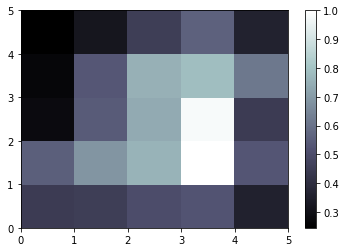

In [85]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

show()

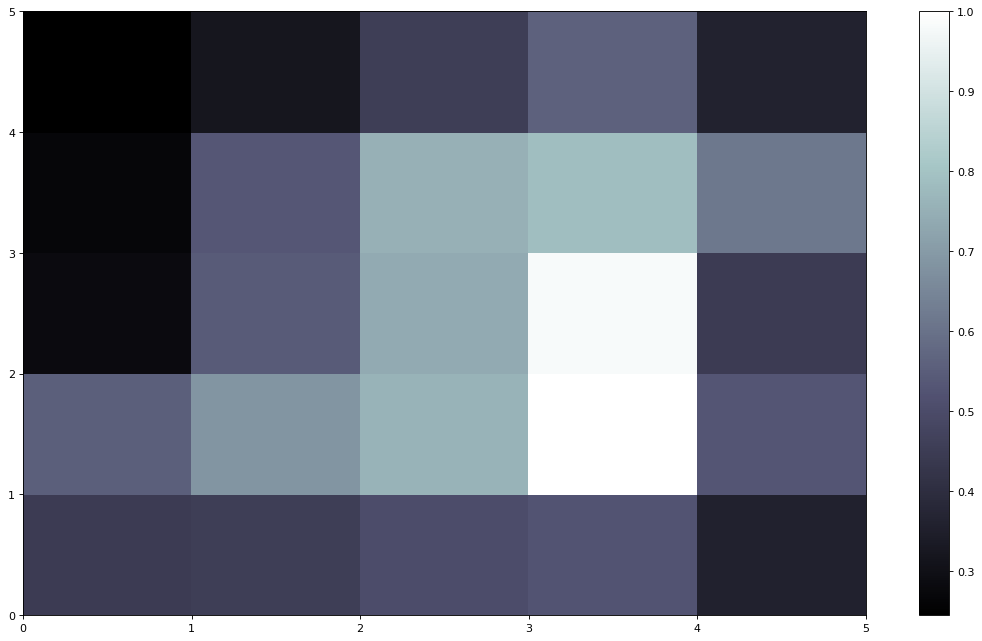

In [86]:
# 5*5 map 을 평면 위에 표현
# node 에 최근접한 data point 들이 많을수록 짙게, 적을수록 옅게 표시 (Map 의 진한 부분엔 데이터들이 모여있다는 뜻)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

plt.figure(figsize=(17, 10), dpi= 80, facecolor='w', edgecolor='k') # To make the fig bigger 

pcolor(som.distance_map().T)
# This line finds out the mean inter neuron distance and makes a map based on these distances.
# It makes clusters based on the colours based on the distances. The darker the colour the closer the neurons is to it's neighbourhood.
# The lighter neurons are the outliers and if customers are present in it that means they are fradulent.
colorbar() # This is the legend of the map

In [90]:
som.distance_map()

array([[0.44674855, 0.55242541, 0.28115982, 0.26841063, 0.24503941],
       [0.45477794, 0.68621307, 0.54460231, 0.53399603, 0.32076084],
       [0.50198571, 0.75996017, 0.73795892, 0.75235357, 0.45585258],
       [0.52461688, 1.        , 0.9820253 , 0.78505683, 0.55987441],
       [0.35834389, 0.53047062, 0.44735005, 0.61396289, 0.36212404]])

In [89]:
pd.DataFrame(som.distance_map())

,0,1,2,3,4
0,0.446749,0.552425,0.281160,0.268411,0.245039
1,0.454778,0.686213,0.544602,0.533996,0.320761
2,0.501986,0.759960,0.737959,0.752354,0.455853
3,0.524617,1.000000,0.982025,0.785057,0.559874
4,0.358344,0.530471,0.447350,0.613963,0.362124


In [94]:
som.win_map(X)

defaultdict(list,
            {(0,
              1): [array([0.12526316, 0.40928571, 0.23076923, 0.375     , 0.05561404,
                     0.05      , 0.01212   ]), array([0.11909774, 0.41071429, 0.30769231, 0.25      , 0.        ,
                     0.        , 0.        ]), array([0.05518797, 0.23214286, 0.15384615, 0.375     , 0.00438596,
                     0.03      , 0.001     ]), array([0.11654135, 0.41071429, 0.15384615, 0.375     , 0.01754386,
                     0.05      , 0.00068   ]), array([0.07263158, 0.35714286, 0.07692308, 0.375     , 0.0145614 ,
                     0.04      , 0.00042   ]), array([0.2243609 , 0.51785714, 0.07692308, 0.375     , 0.00438596,
                     0.        , 0.00286   ]), array([7.89473684e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                     0.00000000e+00, 2.25000000e-02, 1.00000000e-05]), array([7.63909774e-02, 1.26428571e-01, 0.00000000e+00, 0.00000000e+00,
                     0.00000000e+00, 9.00000000e-

## y(target)값이 있는 경우 다음의 시각화도 가능

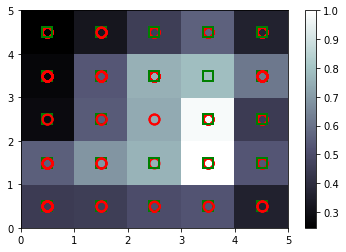

In [87]:
# y값도 표현 (카드발급 승인 여부: y=0 -> 빨간 동그라미 o, y=1 -> 초록 네모 square)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

참고 (SOM):

https://pypi.org/project/sklearn-som/

https://github.com/rileypsmith/sklearn-som/blob/main/example/example.py

https://sklearn-som.readthedocs.io/en/latest/





https://www.infoking.site/37

http://jaynewho.com/post/7

https://blog.naver.com/slykid/221970736285

https://lovit.github.io/visualization/2019/12/02/som_part1/





https://github.com/samarthjsh300/Self-Organizing-Maps



https://www.kaggle.com/pranayprasad/credit-card-fraud-detection

https://www.kaggle.com/monntosky/self-organising-maps

https://rubikscode.net/2018/09/24/credit-card-fraud-detection-using-self-organizing-maps-and-python/

https://colab.research.google.com/github/taruma/hidrokit-nb/blob/master/notebook/taruma_udemy_som_megacasestudy.ipynb




https://github.com/JustGlowing/minisom



https://github.com/Kursula/Kohonen_SOM